In [2]:
!python --version


Python 3.8.10


# Problem Statement


In [4]:
Loan Approval on basis of information provided by users.[Classification Yes or No]

In [1]:
#Import Library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [80]:
pip install -U imbalanced-learn


  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


# Data Gathering


In [2]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [ ]:
1] missing values and outliers
2] data types
3] distribution,imbalance balance data,skew
4]corr


In [3]:
# duplicate values

df.duplicated().sum()


0

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing Values

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Gender==MODE
#Married==MODE
#Dependents==MODE
#Self_Employed==MODE
#LoanAmount==Mean
#Loan_Amount_term==Mean
#Credit_History==Midean

###

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)


In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Types

In [ ]:
Loan_ID            614 non-null    object  Not Requried delete
Gender             601 non-null    object 
Married            611 non-null    object 
Dependents         599 non-null    object 
Education          614 non-null    object 
Self_Employed      582 non-null    object 
Property_Area      614 non-null    object 
Loan_Status        614 non-null    object 

In [10]:
def check_vc(feature_name):
    return df[feature_name].value_counts().to_dict()
print(check_vc('Gender'))
print(check_vc('Married'))
print(check_vc('Dependents'))
print(check_vc('Education'))
print(check_vc('Self_Employed'))
print(check_vc('Property_Area'))
print(check_vc('Loan_Status'))


{'Male': 502, 'Female': 112}
{'Yes': 401, 'No': 213}
{'0': 360, '1': 102, '2': 101, '3+': 51}
{'Graduate': 480, 'Not Graduate': 134}
{'No': 532, 'Yes': 82}
{'Semiurban': 233, 'Urban': 202, 'Rural': 179}
{'Y': 422, 'N': 192}


In [11]:
def impute(feature_name,**kwargs):
    df[feature_name].replace(kwargs,inplace=True)
print(impute('Gender',Male=0,Female=1))  
print(impute('Married',Yes=1,No=0))
print(impute('Self_Employed',No=0, Yes=1))
print(impute('Property_Area',Semiurban=0, Urban=2, Rural =1))
print(impute('Loan_Status',N= 0, Y = 1))



None
None
None
None
None


In [12]:
df['Dependents'].replace({'3+':3},inplace=True)
df['Dependents']=df['Dependents'].astype(int)

In [13]:
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 60.1+ KB


# Check Outliers

<AxesSubplot: >

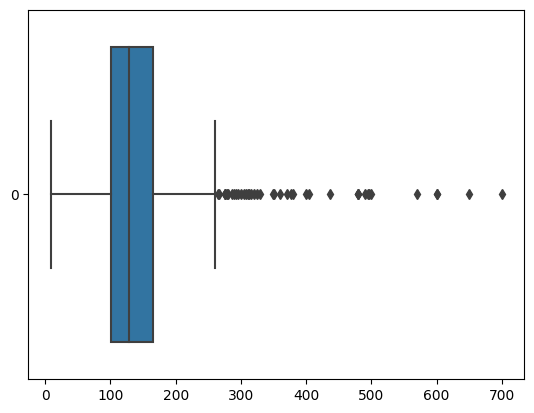

In [16]:
sns.boxplot(df['LoanAmount'], orient = "h")

<AxesSubplot: >

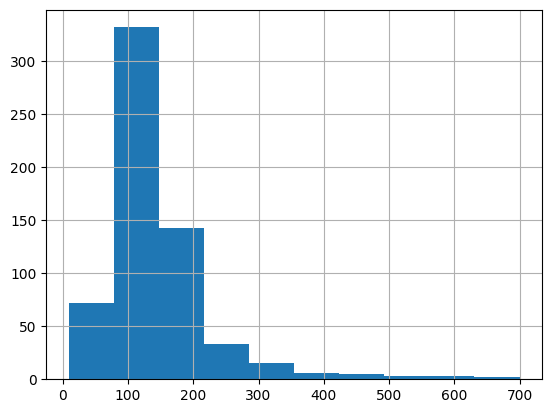

In [18]:
df['LoanAmount'].hist()

<AxesSubplot: >

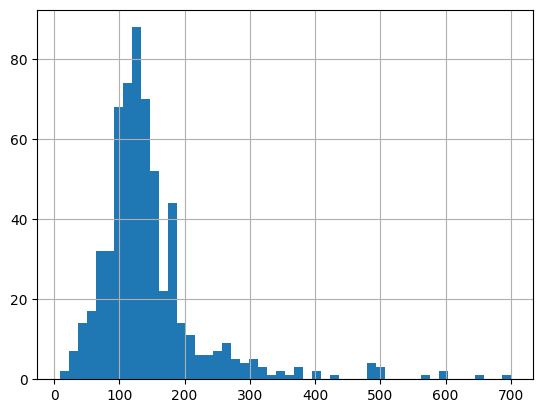

In [19]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot: >

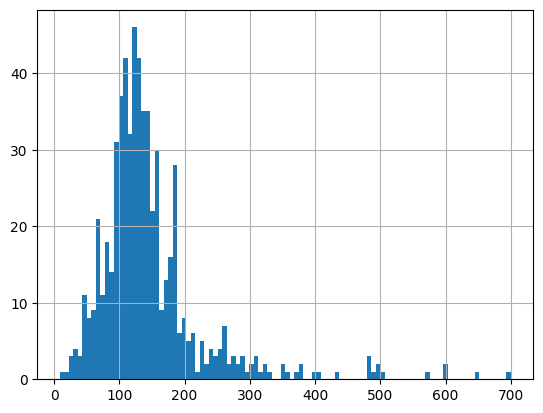

In [20]:
df['LoanAmount'].hist(bins=100)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

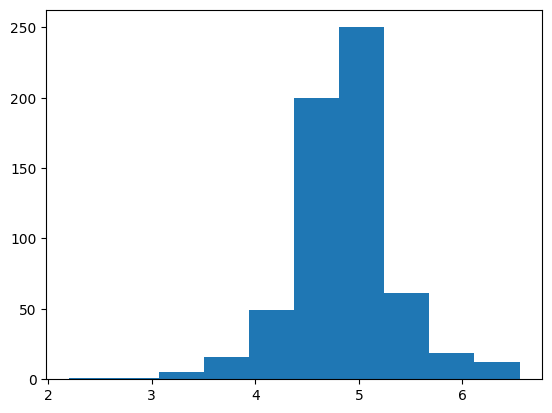

In [21]:
plt.hist(np.log(df['LoanAmount']))

In [22]:
df['log_LoanAmount'] = np.log(df['LoanAmount'])

<AxesSubplot: >

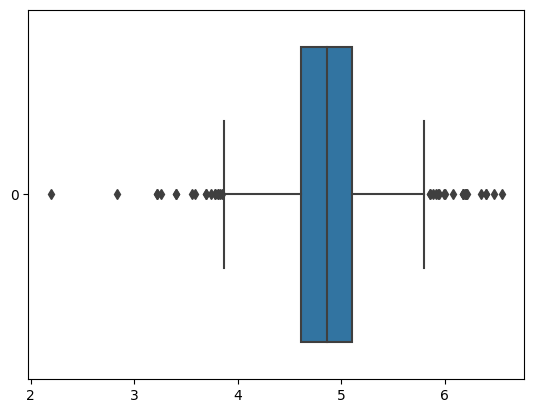

In [23]:
sns.boxplot(df['log_LoanAmount'], orient = "h")

<AxesSubplot: xlabel='log_LoanAmount', ylabel='Density'>

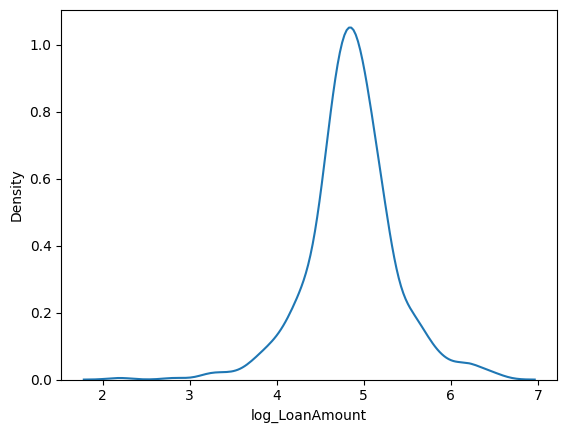

In [24]:
sns.kdeplot(df['log_LoanAmount'])

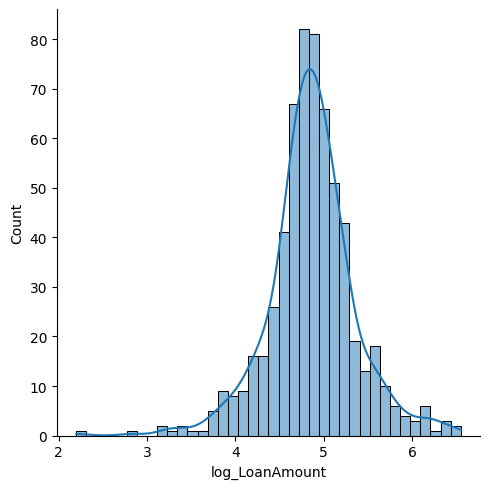

In [25]:
sns.displot(df['log_LoanAmount'], kde= True)

# hypothesis testing

In [ ]:
h0 == log_loanAmount is normally distributed.



In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,4.262680
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1,3.688879
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109


In [27]:
df['totalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030,6091.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,4.262680,2900.0
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1,3.688879,4106.0
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0


(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <BarContainer object of 10 artists>)

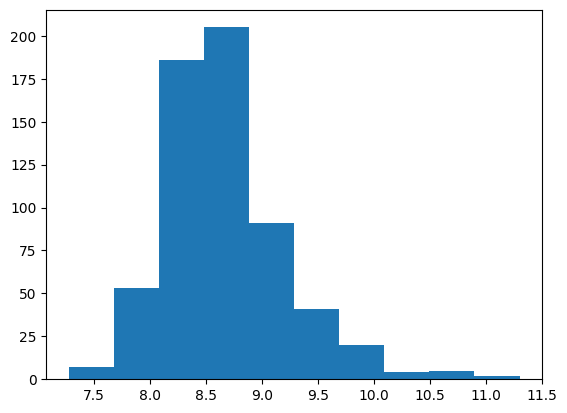

In [29]:
plt.hist(np.log(df['totalIncome']))

<AxesSubplot: >

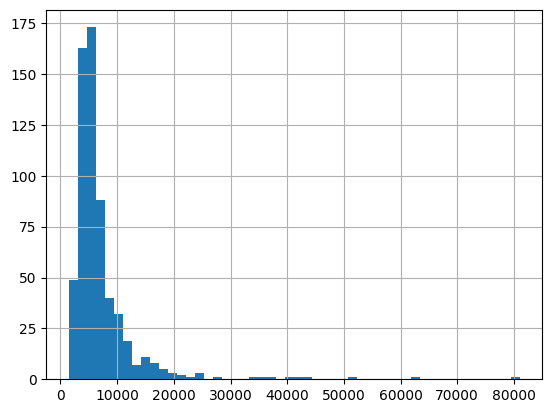

In [30]:
df['totalIncome'].hist(bins=50)

In [31]:
df['log_totalIncome'] = np.log(df['totalIncome'])

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome,log_totalIncome
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,4.262680,2900.0,7.972466
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


# Feature selection

In [33]:
delete_features = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount', 'totalIncome']
df.drop(columns = delete_features, axis=1, inplace=True)


In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_totalIncome
0,0,0,0,1,0,360.0,1.0,2,1,4.986426,8.674026
1,0,1,1,1,0,360.0,1.0,1,0,4.852030,8.714568
2,0,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,0,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,0,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,360.0,1.0,1,1,4.262680,7.972466
610,0,1,3,1,0,180.0,1.0,1,1,3.688879,8.320205
611,0,1,1,1,0,360.0,1.0,2,1,5.533389,9.025456
612,0,1,2,1,0,360.0,1.0,2,1,5.231109,8.933664


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int64  
 8   Loan_Status       614 non-null    int64  
 9   log_LoanAmount    614 non-null    float64
 10  log_totalIncome   614 non-null    float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 50.5 KB


In [ ]:
1. Filter Methods 
2. Wrapper Methods 
3. Emebedded Methods 

In [36]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_totalIncome
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,0.073567,-0.009170,-0.082045,-0.017987,-0.144378,-0.167285
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,-0.100863,0.010938,-0.003071,0.091478,0.180178,0.151527
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,-0.101054,-0.040160,-0.001781,0.010118,0.156391,0.112812
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.077242,0.073658,-0.003592,0.085884,0.143367,0.204861
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,-0.033943,-0.001550,-0.021996,-0.003700,0.109629,0.176709
Loan_Amount_Term,0.073567,-0.100863,-0.101054,0.077242,-0.033943,1.000000,0.000432,-0.089508,-0.020974,0.086531,-0.055320
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,0.000432,1.000000,-0.030248,0.540556,-0.019542,0.020791
Property_Area,-0.082045,-0.003071,-0.001781,-0.003592,-0.021996,-0.089508,-0.030248,1.000000,-0.103253,-0.047043,-0.005805
Loan_Status,-0.017987,0.091478,0.010118,0.085884,-0.003700,-0.020974,0.540556,-0.103253,1.000000,-0.041874,0.007240
log_LoanAmount,-0.144378,0.180178,0.156391,0.143367,0.109629,0.086531,-0.019542,-0.047043,-0.041874,1.000000,0.657507


<AxesSubplot: >

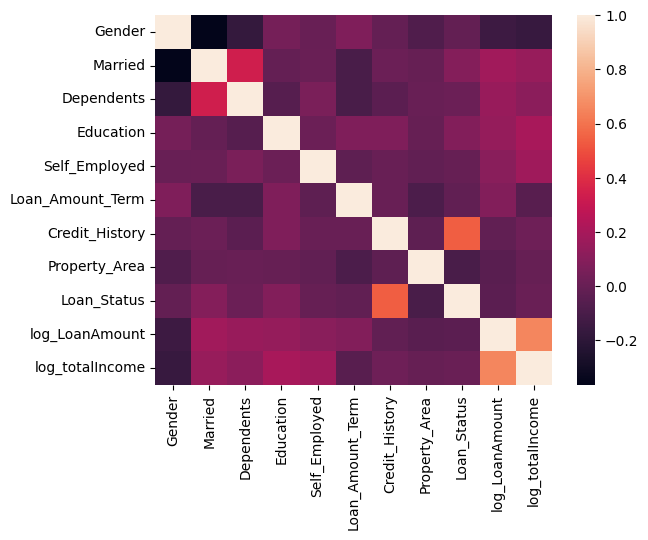

In [37]:
sns.heatmap(df.corr())

<AxesSubplot: >

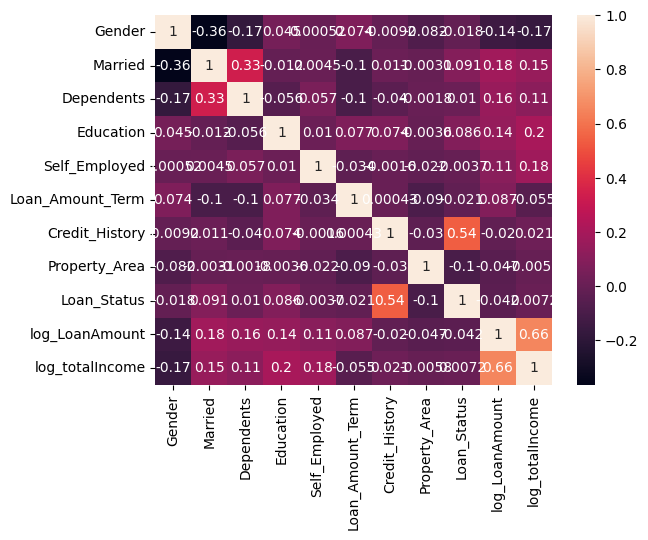

In [39]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

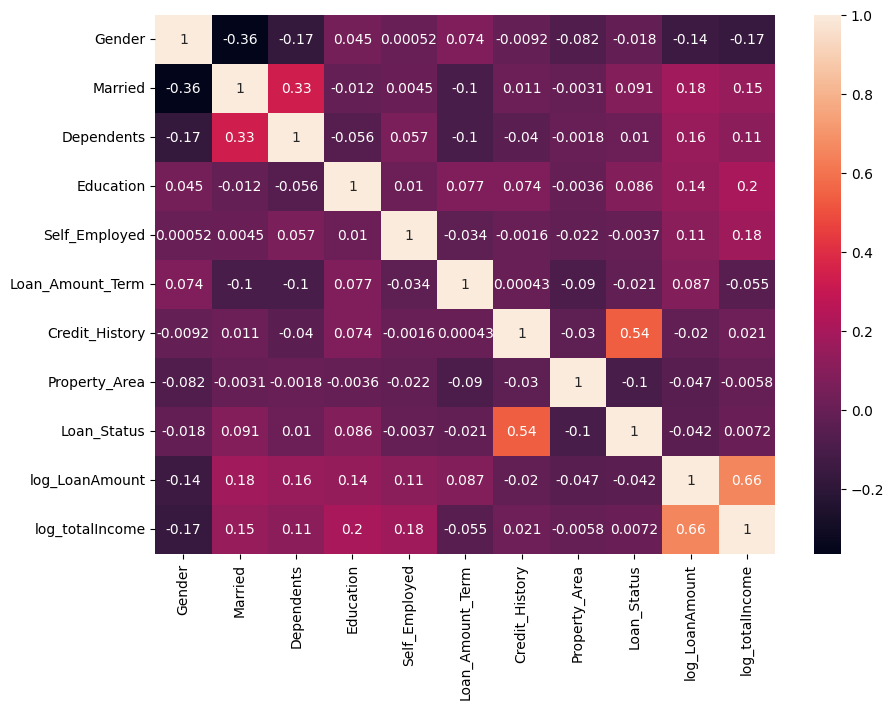

In [40]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

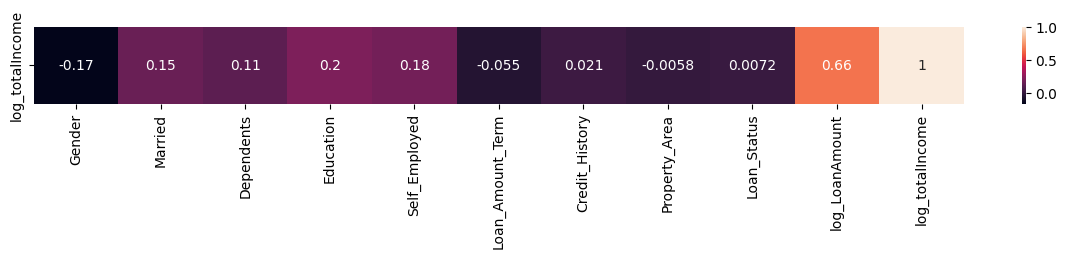

In [41]:
plt.figure(figsize= (15,1))
sns.heatmap(df.corr().tail(1), annot=True)

In [42]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount', 'log_totalIncome'],
      dtype='object')

In [43]:
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'log_LoanAmount', 'log_totalIncome','Loan_Status']]

<AxesSubplot: >

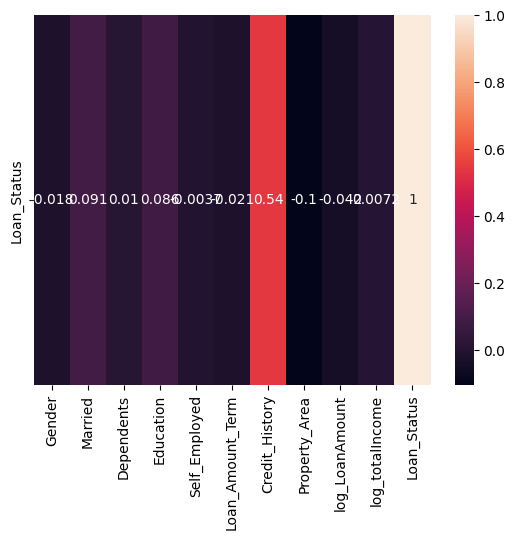

In [45]:
sns.heatmap(df.corr().tail(1), annot=True)

In [49]:
df['Loan_Status'].value_counts()


1    422
0    192
Name: Loan_Status, dtype: int64

In [50]:
### Balance the Data 
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

smote = SMOTE(k_neighbors=6,sampling_strategy=0.9)
x_smote,y_smote = smote.fit_resample(x,y)
x_smote.shape,y_smote.shape 

((801, 10), (801,))

In [51]:
y_smote.value_counts()

1    422
0    379
Name: Loan_Status, dtype: int64

In [52]:
379/422

0.8981042654028436

In [53]:
x_smote.shape,y_smote.shape 

((801, 10), (801,))

# model traning

In [54]:
### Split the data 

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote, test_size=0.25,
                                                 random_state=12, stratify=y_smote)


In [55]:
### Logistic Regression 

model = LogisticRegression()
model.fit(x_train,y_train)
### Prediction on test data
y_pred = model.predict(x_test)

### Model Evaluation on Test data 
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score= {acc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix = \n{cm}")

cr = classification_report(y_test, y_pred)
print(f"Classification Report = \n{cr}")

Accuracy Score= 0.6766169154228856
Confusion Matrix = 
[[47 48]
 [17 89]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.73      0.49      0.59        95
           1       0.65      0.84      0.73       106

    accuracy                           0.68       201
   macro avg       0.69      0.67      0.66       201
weighted avg       0.69      0.68      0.67       201



C:\Users\hp-pc\.conda\envs\Loan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
def model_train(model, x, y):
    model_ob = model
    return model_ob.fit(x,y)

def model_eval(data,actual,model):
    
    y_pred = model.predict(data)

    ### Model Evaluation on Test data 
    acc = accuracy_score(actual,y_pred)
    print(f"Accuracy Score= {acc}")

    cm = confusion_matrix(actual, y_pred)
    print(f"Confusion Matrix = \n{cm}")

    cr = classification_report(actual, y_pred)
    print(f"Classification Report = \n{cr}")
    
    return acc 
    
model = LogisticRegression()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)
result = test_acc-train_acc
result

Accuracy Score= 0.6766169154228856
Confusion Matrix = 
[[47 48]
 [17 89]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.73      0.49      0.59        95
           1       0.65      0.84      0.73       106

    accuracy                           0.68       201
   macro avg       0.69      0.67      0.66       201
weighted avg       0.69      0.68      0.67       201

Accuracy Score= 0.7333333333333333
Confusion Matrix = 
[[161 123]
 [ 37 279]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       284
           1       0.69      0.88      0.78       316

    accuracy                           0.73       600
   macro avg       0.75      0.72      0.72       600
weighted avg       0.75      0.73      0.73       600



C:\Users\hp-pc\.conda\envs\Loan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.05671641791044768

In [57]:
### KNN 

model = KNeighborsClassifier()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7064676616915423
Confusion Matrix = 
[[62 33]
 [26 80]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.70      0.65      0.68        95
           1       0.71      0.75      0.73       106

    accuracy                           0.71       201
   macro avg       0.71      0.70      0.70       201
weighted avg       0.71      0.71      0.71       201

Accuracy Score= 0.8333333333333334
Confusion Matrix = 
[[232  52]
 [ 48 268]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       284
           1       0.84      0.85      0.84       316

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [58]:
### Decision Tree

model = DecisionTreeClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.746268656716418
Confusion Matrix = 
[[63 32]
 [19 87]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        95
           1       0.73      0.82      0.77       106

    accuracy                           0.75       201
   macro avg       0.75      0.74      0.74       201
weighted avg       0.75      0.75      0.74       201

Accuracy Score= 1.0
Confusion Matrix = 
[[284   0]
 [  0 316]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       316

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
1. Hyperparameter Tuning 
2. Pruning 
3. Use Ensemble Methods 

In [59]:
model = DecisionTreeClassifier(random_state=5)

hyp = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
    
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 2,
 'criterion': 'entropy'}

In [60]:
model = DecisionTreeClassifier(random_state=5)

hyp = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

y_pred = hyp_model.predict(x_test)

### Model Evaluation on Test data 
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score= {acc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix = \n{cm}")

cr = classification_report(y_test, y_pred)
print(f"Classification Report = \n{cr}")

# test_acc = model_eval(x_test, y_test,hyp_model)
# train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.7164179104477612
Confusion Matrix = 
[[ 41  54]
 [  3 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.43      0.59        95
           1       0.66      0.97      0.78       106

    accuracy                           0.72       201
   macro avg       0.79      0.70      0.69       201
weighted avg       0.79      0.72      0.69       201



In [61]:
### Random Forest Algo

model = RandomForestClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7711442786069652
Confusion Matrix = 
[[64 31]
 [15 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.81      0.67      0.74        95
           1       0.75      0.86      0.80       106

    accuracy                           0.77       201
   macro avg       0.78      0.77      0.77       201
weighted avg       0.78      0.77      0.77       201

Accuracy Score= 1.0
Confusion Matrix = 
[[284   0]
 [  0 316]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       316

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [62]:
model = RandomForestClassifier(random_state=5)

hyp = {
     'n_estimators':np.arange(50,300,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

# y_pred = hyp_model.predict(x_test)

# ### Model Evaluation on Test data 
# acc = accuracy_score(y_test,y_pred)
# print(f"Accuracy Score= {acc}")

# cm = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix = \n{cm}")

# cr = classification_report(y_test, y_pred)
# print(f"Classification Report = \n{cr}")

test_acc = model_eval(x_test, y_test,hyp_model)
train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.7114427860696517
Confusion Matrix = 
[[ 40  55]
 [  3 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        95
           1       0.65      0.97      0.78       106

    accuracy                           0.71       201
   macro avg       0.79      0.70      0.68       201
weighted avg       0.78      0.71      0.69       201

Accuracy Score= 0.7616666666666667
Confusion Matrix = 
[[147 137]
 [  6 310]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.96      0.52      0.67       284
           1       0.69      0.98      0.81       316

    accuracy                           0.76       600
   macro avg       0.83      0.75      0.74       600
weighted avg       0.82      0.76      0.75       600



In [63]:
### Adaboost Algo

model = AdaBoostClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7213930348258707
Confusion Matrix = 
[[57 38]
 [18 88]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        95
           1       0.70      0.83      0.76       106

    accuracy                           0.72       201
   macro avg       0.73      0.72      0.71       201
weighted avg       0.73      0.72      0.72       201

Accuracy Score= 0.8266666666666667
Confusion Matrix = 
[[208  76]
 [ 28 288]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       284
           1       0.79      0.91      0.85       316

    accuracy                           0.83       600
   macro avg       0.84      0.82      0.82       600
weighted avg       0.83      0.83      0.82       600



In [64]:
### Naive Bayes Algo

model = GaussianNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7064676616915423
Confusion Matrix = 
[[ 39  56]
 [  3 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        95
           1       0.65      0.97      0.78       106

    accuracy                           0.71       201
   macro avg       0.79      0.69      0.67       201
weighted avg       0.78      0.71      0.68       201

Accuracy Score= 0.745
Confusion Matrix = 
[[137 147]
 [  6 310]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.96      0.48      0.64       284
           1       0.68      0.98      0.80       316

    accuracy                           0.74       600
   macro avg       0.82      0.73      0.72       600
weighted avg       0.81      0.74      0.73       600



In [65]:
### Naive Bayes Algo

model = MultinomialNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.6268656716417911
Confusion Matrix = 
[[46 49]
 [26 80]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        95
           1       0.62      0.75      0.68       106

    accuracy                           0.63       201
   macro avg       0.63      0.62      0.62       201
weighted avg       0.63      0.63      0.62       201

Accuracy Score= 0.6833333333333333
Confusion Matrix = 
[[147 137]
 [ 53 263]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.73      0.52      0.61       284
           1       0.66      0.83      0.73       316

    accuracy                           0.68       600
   macro avg       0.70      0.67      0.67       600
weighted avg       0.69      0.68      0.67       600



In [66]:
### Naive Bayes Algo

model = BernoulliNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.6567164179104478
Confusion Matrix = 
[[41 54]
 [15 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.73      0.43      0.54        95
           1       0.63      0.86      0.73       106

    accuracy                           0.66       201
   macro avg       0.68      0.65      0.63       201
weighted avg       0.68      0.66      0.64       201

Accuracy Score= 0.715
Confusion Matrix = 
[[140 144]
 [ 27 289]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.49      0.62       284
           1       0.67      0.91      0.77       316

    accuracy                           0.71       600
   macro avg       0.75      0.70      0.70       600
weighted avg       0.75      0.71      0.70       600



In [67]:
import xgboost as xgb

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\hp-pc\.conda\envs\loan\lib\site-packages (1.7.1)



In [72]:
### Xgboost 

### Naive Bayes Algo

model = xgb()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

TypeError: 'module' object is not callable

In [ ]:
Model train_Acc Test_acc Time_complexity
Select The optimised Model 

## User Test 

API 


front End 


Deployemnt 

In [ ]:
Test Train
71     73 LR
73     80 KNN
76     100 DT
74     74 DT-HYP
82     100 Rf
76     76 RF- Hyp
74     81 ADAbOOst
---------------

76     76 RF- Hyp
91     91  --- RF - Hyp -- Final model for Deployment 

In [74]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1


In [73]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'log_LoanAmount',
       'log_totalIncome', 'Loan_Status'],
      dtype='object')

In [75]:
model = RandomForestClassifier(random_state=5)

hyp = {
     'n_estimators':np.arange(50,300,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

test_acc = model_eval(x_test, y_test,hyp_model)
train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.7114427860696517
Confusion Matrix = 
[[ 40  55]
 [  3 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        95
           1       0.65      0.97      0.78       106

    accuracy                           0.71       201
   macro avg       0.79      0.70      0.68       201
weighted avg       0.78      0.71      0.69       201

Accuracy Score= 0.7616666666666667
Confusion Matrix = 
[[147 137]
 [  6 310]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.96      0.52      0.67       284
           1       0.69      0.98      0.81       316

    accuracy                           0.76       600
   macro avg       0.83      0.75      0.74       600
weighted avg       0.82      0.76      0.75       600



In [76]:
ui = df.head(1)
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1


In [77]:
ui.drop('Loan_Status', axis=1, inplace= True )
ui

C:\Users\hp-pc\AppData\Local\Temp\ipykernel_15076\2136240972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ui.drop('Loan_Status', axis=1, inplace= True )


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026


In [78]:
result = hyp_model.predict(ui)
result

array([1], dtype=int64)

In [79]:
import pickle
with open('model.pkl','wb') as file: 
    pickle.dump(hyp_model,file)

In [80]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1
1,0,1,1,1,0,360.0,1.0,1,4.852030,8.714568,0
2,0,1,0,1,1,360.0,1.0,2,4.189655,8.006368,1
3,0,1,0,0,0,360.0,1.0,2,4.787492,8.505323,1
4,0,0,0,1,0,360.0,1.0,2,4.948760,8.699515,1
5,0,1,2,1,1,360.0,1.0,2,5.587249,9.170872,1
6,0,1,0,0,0,360.0,1.0,2,4.553877,8.255569,1
7,0,1,3,1,0,360.0,0.0,0,5.062595,8.619750,0
8,0,1,2,1,0,360.0,1.0,2,5.123964,8.618305,1
9,0,1,1,1,0,360.0,1.0,0,5.855072,10.077819,0


In [81]:
col_name = list(x_train.columns)
col_name

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'log_LoanAmount',
 'log_totalIncome']

In [82]:
import json
d1 = {'column_name' :col_name }
with open('feature_names.json','w') as file:
    json.dump(d1,file)
